# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load Dataset 

In [10]:
df = pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Data Understanding

In [4]:
df.shape

(10127, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# Data Cleaning

In [13]:
df.drop(['CLIENTNUM'], axis=1, inplace=True)

In [14]:
df.drop([
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1, inplace=True)

In [15]:
df.shape

(10127, 20)

# Select Important Features

In [11]:
data = df[['Credit_Limit',
           'Total_Trans_Amt',
           'Total_Trans_Ct',
           'Avg_Utilization_Ratio',
           'Months_on_book']]

# RFM Analysis

In [12]:
rfm = df[['Months_on_book',
          'Total_Trans_Ct',
          'Total_Trans_Amt']]

rfm.columns = ['Recency','Frequency','Monetary']

rfm.head()

,Recency,Frequency,Monetary
0,39,42,1144
1,44,33,1291
2,36,20,1887
3,34,20,1171
4,21,28,816


# Exploratory Data Analysis

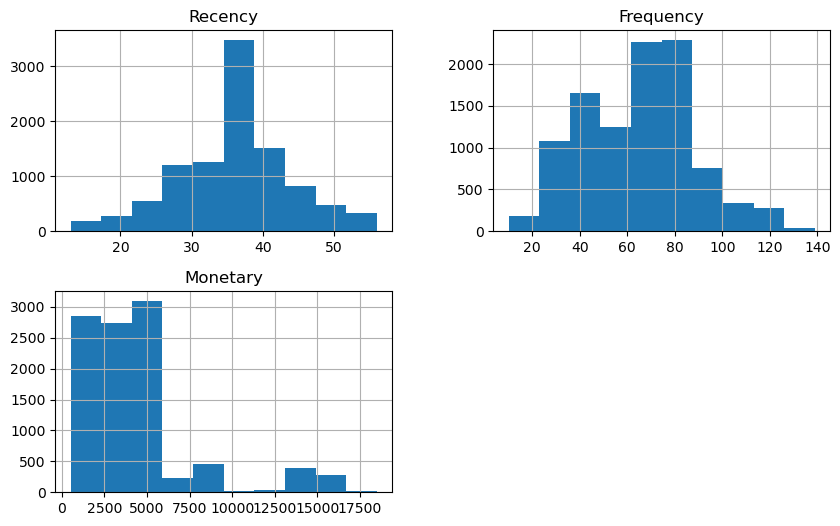

In [13]:
# Distribution Plot
rfm.hist(figsize=(10,6))
plt.show()

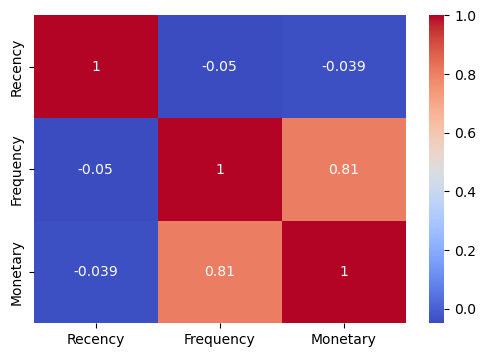

In [14]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature Scaling

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm)

# Find Optimal Clusters

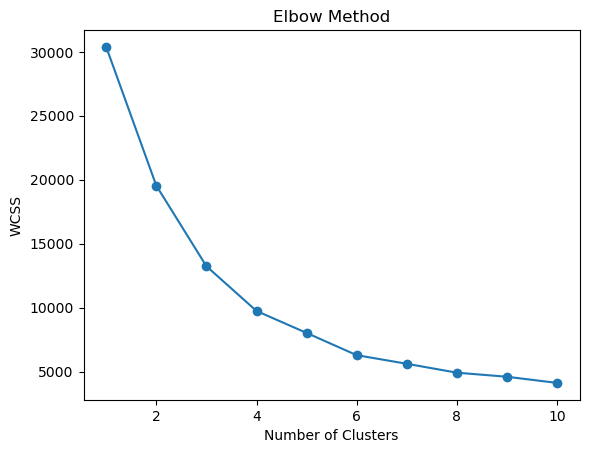

In [16]:
#Elbow Method
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [17]:
#Silhouette Score
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print("Clusters:", k, "Score:", score)

Clusters: 2 Score: 0.4868174060292306
Clusters: 3 Score: 0.3779702401470449
Clusters: 4 Score: 0.3771495396219678
Clusters: 5 Score: 0.3394404056980493
Clusters: 6 Score: 0.37534352452118264


# Apply K-Means

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [21]:
df['Cluster'].value_counts()

Cluster
2    4506
0    2877
1    1982
3     762
Name: count, dtype: int64

# PCA Visualization

In [22]:
#Reduce dimensions.
pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_data)

df['PCA1'] = pca_data[:,0]
df['PCA2'] = pca_data[:,1]

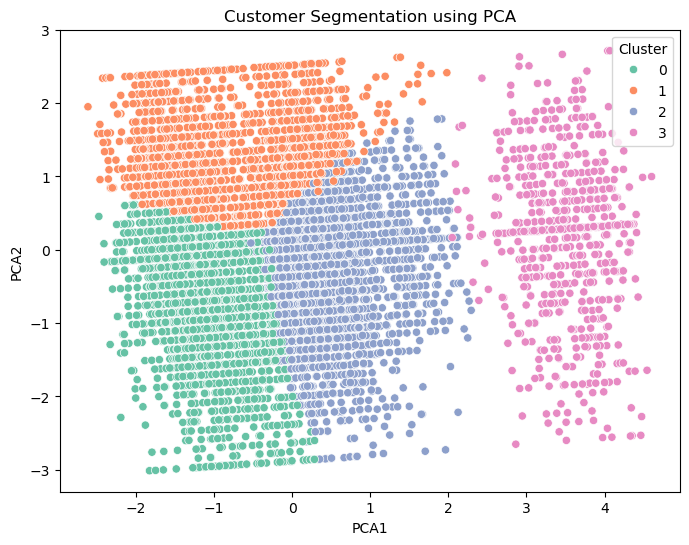

In [23]:
#Plot Clusters
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=df,
    palette='Set2'
)

plt.title("Customer Segmentation using PCA")
plt.show()

In [24]:
print(pca.explained_variance_ratio_)

[0.60400174 0.33175505]


# Cluster Profiling

In [25]:
cluster_profile = df.groupby('Cluster')[[
    'Credit_Limit',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio'
]].mean()

cluster_profile

,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Cluster,,,,
0,8573.008690,2022.601668,41.486966,0.257476
1,7751.572957,3015.439455,54.223007,0.283996
2,8127.839436,4813.406125,76.773191,0.297955
3,14125.442257,14587.070866,110.309711,0.180608


# Label Customer Segments

In [26]:
cluster_names = {
    0: "High Value Customers",
    1: "Low Engagement",
    2: "Risk Customers",
    3: "Regular Customers"
}

df['Customer_Segment'] = df['Cluster'].map(cluster_names)

# Segment Distribution

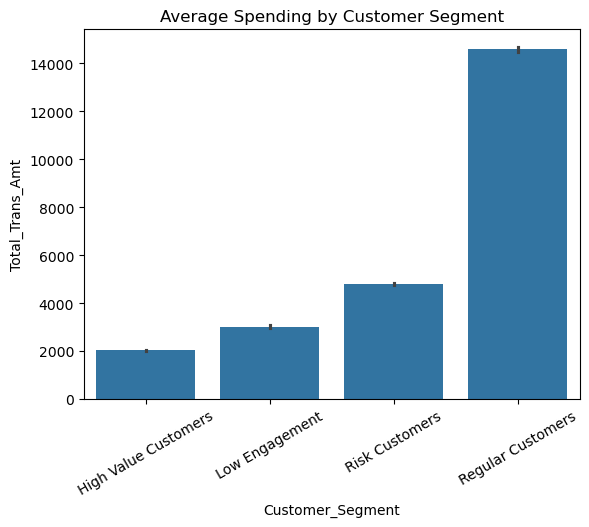

In [43]:
sns.barplot(
    x='Customer_Segment',
    y='Total_Trans_Amt',
    data=df
)
plt.xticks(rotation=30)
plt.title("Average Spending by Customer Segment")
plt.show()

# Business Insights (Final Step)

In [29]:
df.groupby('Customer_Segment').mean(numeric_only=True)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster,PCA1,PCA2
Customer_Segment,,,,,,,,,,,,,,,,,
High Value Customers,42.766423,2.356274,31.523114,4.071255,2.355231,2.686827,8573.008690,1126.359055,7446.649635,0.769637,2022.601668,41.486966,0.675733,0.257476,0.0,-1.154023,-0.640020
Low Engagement,55.133199,1.829465,46.692735,4.057013,2.434914,2.534309,7751.572957,1150.450555,6601.122402,0.748138,3015.439455,54.223007,0.693246,0.283996,1.0,-0.711157,1.297376
Regular Customers,45.116798,2.280840,35.065617,2.339895,2.212598,2.223097,14125.442257,1364.539370,12760.902887,0.775940,14587.070866,110.309711,0.749437,0.180608,3.0,3.486663,0.167518
Risk Customers,44.929206,2.578118,34.152241,3.788948,2.312694,2.312028,8127.839436,1157.414780,6970.424656,0.756235,4813.406125,76.773191,0.737574,0.297955,2.0,0.460009,-0.190348


In [31]:
df.to_csv("Customer_Segmentation_Output.csv", index=False)

# Business Recommendation System

In [32]:
df1= pd.read_csv("Customer_Segmentation_Output.csv")
df1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster,PCA1,PCA2,Customer_Segment
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,11914.0,1.335,1144,42,1.625,0.061,0,-1.392758,0.278608,High Value Customers
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,7392.0,1.541,1291,33,3.714,0.105,1,-1.680761,0.887336,Low Engagement
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0,-1.870845,-0.126863,High Value Customers
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,796.0,1.405,1171,20,2.333,0.760,0,-2.000166,-0.389461,High Value Customers
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,2.175,816,28,2.500,0.000,0,-1.708465,-2.002700,High Value Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,2152.0,0.703,15476,117,0.857,0.462,3,3.824688,0.813056,Regular Customers
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,2091.0,0.804,8764,69,0.683,0.511,2,1.134023,-1.277370,Risk Customers
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0.819,10291,60,0.818,0.000,2,1.074649,0.105302,Risk Customers
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,5281.0,0.535,8395,62,0.722,0.000,2,0.741391,0.075143,Risk Customers


In [33]:
df1['Customer_Segment']

0        High Value Customers
1              Low Engagement
2        High Value Customers
3        High Value Customers
4        High Value Customers
                 ...         
10122       Regular Customers
10123          Risk Customers
10124          Risk Customers
10125          Risk Customers
10126          Risk Customers
Name: Customer_Segment, Length: 10127, dtype: object

In [35]:
def business_recommendation(segment):

    if segment == "High Value Customers":
        return "Provide premium rewards, higher credit limit, and exclusive offers"

    elif segment == "Regular Customers":
        return "Offer loyalty points, cashback programs, and cross-selling opportunities"

    elif segment == "Low Engagement":
        return "Send activation offers, discounts, and usage reminders"

    elif segment == "Risk Customers":
        return "Launch retention campaigns and personalized EMI offers"

    else:
        return "General marketing strategy"

In [36]:
df1['Business_Recommendation'] = df1['Customer_Segment'].apply(
    business_recommendation
)

In [37]:
df1[['Customer_Segment','Business_Recommendation']].head()

,Customer_Segment,Business_Recommendation
0,High Value Customers,"Provide premium rewards, higher credit limit, ..."
1,Low Engagement,"Send activation offers, discounts, and usage r..."
2,High Value Customers,"Provide premium rewards, higher credit limit, ..."
3,High Value Customers,"Provide premium rewards, higher credit limit, ..."
4,High Value Customers,"Provide premium rewards, higher credit limit, ..."


In [38]:
recommendation_summary = df1.groupby(
    'Customer_Segment'
)['Business_Recommendation'].first()

recommendation_summary

Customer_Segment
High Value Customers    Provide premium rewards, higher credit limit, ...
Low Engagement          Send activation offers, discounts, and usage r...
Regular Customers       Offer loyalty points, cashback programs, and c...
Risk Customers          Launch retention campaigns and personalized EM...
Name: Business_Recommendation, dtype: object

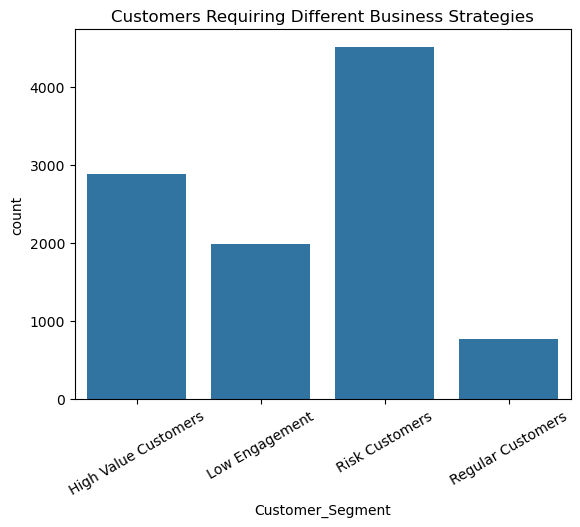

In [39]:
sns.countplot(x='Customer_Segment', data=df1)
plt.title("Customers Requiring Different Business Strategies")
plt.xticks(rotation=30)
plt.show()


In [40]:
pd.DataFrame({
    "Segment": [
        "High Value Customers",
        "Regular Customers",
        "Low Engagement",
        "Risk Customers"
    ],
    "Recommended Action": [
        "Premium rewards & VIP services",
        "Loyalty programs",
        "Activation campaigns",
        "Retention strategies"
    ]
})

,Segment,Recommended Action
0,High Value Customers,Premium rewards & VIP services
1,Regular Customers,Loyalty programs
2,Low Engagement,Activation campaigns
3,Risk Customers,Retention strategies
